In [66]:
import pandas as pd

df = pd.read_csv('./../dashboard layout/data/df_%groen.csv', sep=';')
df_area = pd.read_hdf('./area.hdf', 'key').set_index('BU_NAAM')

df = df[['BU_NAAM', 'perc_groen']].set_index("BU_NAAM")

# https://zoek.officielebekendmakingen.nl/gmb-2020-83481.html
df_area['breda_subsidie'] = df_area.area*20 / 10
df = pd.merge(df_area, df, how='inner', left_index=True, right_index=True)

df.perc_groen /= 100
df['premie_huidige'] = df.breda_subsidie * df.perc_groen
df['premie_nog_te_halen'] = df.breda_subsidie * (1-df.perc_groen)
df = df.sort_index()

In [67]:
df.sort_values('premie_huidige').to_hdf('./kosten-schatting.hdf', 'key')

# Financieel

De financiele impact van droogte is lastig direct te meten. Een onderzoeksrapport van het Ministerie van Infrastructuur en Waterstaat schat dat de droogte in 2018 tussen de 950 en 1600 miljoen heeft gekost. De meeste directe financiele schade zit in de landbouw en scheepvaart, maar er is ook veel indirecte schade aan natuurgebieden en drinkwater reserves.

Een duidelijke relatie tussen vergroening in een klein gebied, en financiele gevolgen is onmogelijk om te leggen door de complexiteit van het watergestel in Nederland. Om toch een inzicht te kunnen geven hebben we gekeken naar de subsidies van de gemeente Breda. Daar wordt een subsidie gegeven van 20 euro per vierkante meter die vergroend wordt in prive- of bedrijfstereinen of daken: https://zoek.officielebekendmakingen.nl/gmb-2020-83481.html

Voor alle buurten van Breda (120.2 km2) zou dat een subsidie van 2.4 miljard euro zijn; significant hoger dan de 60.000 euro die Breda er jaarlijks aan uit wilt geven. Toch is het een goede indicatie van de waarde die de gemeente aan vergroening hangt. We gaan uit van investeringen van 10 jaar, wat komt tot de volgende definitie:

```
1 vierkante meter vergroening heeft een financieel voordeel van 2 euro per jaar
```

In combinatie met de oppervlakte en groen percentages van de wijken uit Breda kunnen we dan onderstaande grafiekjes maken

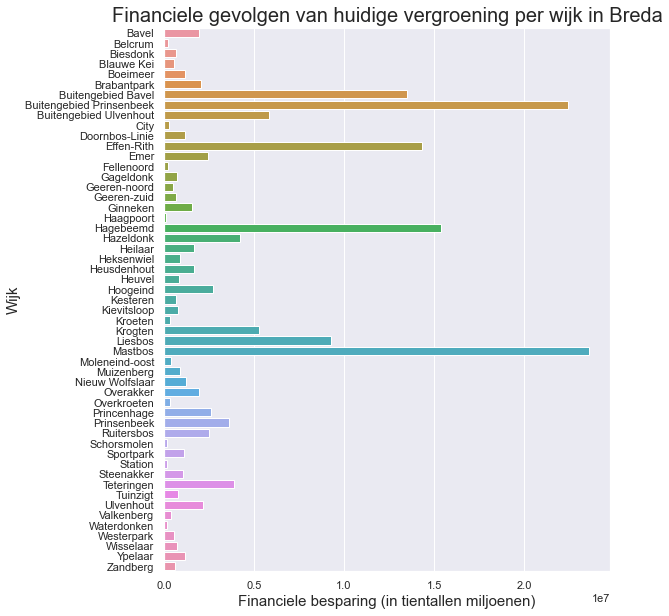

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(8, 10))

sns.barplot(df.premie_huidige.values, df.index, orient="h")

plt.title("Financiele gevolgen van huidige vergroening per wijk in Breda", fontsize=20)
plt.xlabel("Financiele besparing (in tientallen miljoenen)", fontsize=15)
plt.ylabel("Wijk", fontsize=15)
plt.show()


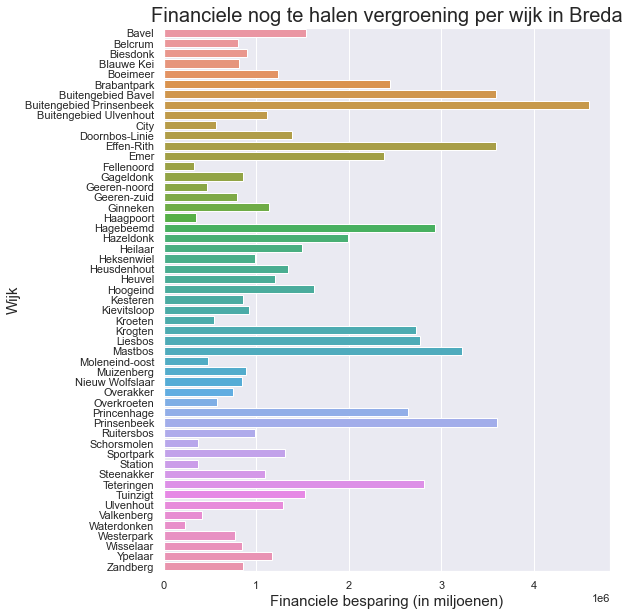

In [73]:

sns.set()
plt.figure(figsize=(8, 10))

sns.barplot(df.premie_nog_te_halen.values, df.index, orient="h")

plt.title("Financiele nog te halen vergroening per wijk in Breda", fontsize=20)
plt.xlabel("Financiele besparing (in miljoenen)", fontsize=15)
plt.ylabel("Wijk", fontsize=15)
plt.show()


In [80]:
df_res = pd.read_hdf('./../data/dashboard-data.v01.hdf', 'key')
df_res = pd.merge(df_res, df[['premie_huidige','premie_nog_te_halen']], left_index=True, right_index=True)
df_res.fauna_observaties = df_res.fauna_observaties.fillna(0)
df_res.to_hdf('./../data/dashboard-data.v01.hdf', 'key')